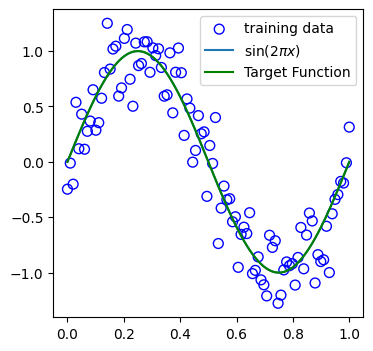

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch

def create_toy_data(func, sample_size, std, domain=[0, 1]):
    x = np.linspace(domain[0], domain[1], sample_size)
    np.random.shuffle(x)
    y = func(x) + np.random.normal(scale=std, size=x.shape)
    return x, y

def sinusoidal(x):
    return np.sin(2 * np.pi * x)

x_train, y_train = create_toy_data(sinusoidal, 100, 0.25)
x_test = np.linspace(0, 1, 100)
y_test = sinusoidal(x_test)

plt.figure(figsize=[4,4])
plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.plot(x_test, y_test, label="$\sin(2\pi x)$")
plt.plot(x_test, y_test, "-g", label="Target Function")
plt.legend()
plt.show()


In [20]:
def getloss(x, y_true, weights):
  loss = 0
  for x, y_true in zip(x, y_true):
    loss += torch.sqrt((y_true - (weights[0] + x*weights[1] + weights[2]*x**2 + weights[3]*x**3))**2)
  return loss

In [19]:
trainingSet = []
validationSet = []
def gradient_descent(gradient, x, y, start, learn_rate=0.1, n_iter=50, batch_size=10):
  vector = start
  xy = torch.tensor((x, y))
  xy = xy[:, torch.randperm(xy.size()[1])]
  validation = [xy[0][:len(x)//10], xy[1][:len(x)//10]]
  xy = xy.tolist()
  xy = torch.tensor((xy[0][len(x)//10:], xy[1][len(x)//10:]))

  for _ in range(n_iter):
    # randomize to get random x,y pairs
    xy = xy[:, torch.randperm(xy.size()[1])]

    # divide up work into minibatches
    x_b, y_b = xy[0][:batch_size], xy[1][:batch_size]

    # Multiply learning rate by gradient, then update weights
    diff = -learn_rate * gradient(x_b, y_b, vector)
    vector += diff

    # Keep track of loss to graph later on
    trainingSet.append(getloss(xy[0], xy[1], vector) / len(xy[0]))
    validationSet.append(getloss(validation[0], validation[1], vector) / len(validation[0]))
  return vector

In [21]:
# function that calculates the gradient of sum of squared residuals
def ssr_gradient(x, y, b):
  # The actual equation used to get each residual
  res = torch.tensor([b[0] + b[1]*x + b[2]*x**2 + b[3]*x**3 - y for x, y in zip(x, y)])
  return torch.tensor([torch.mean(res), torch.mean(res*x), torch.mean(res*x**2), torch.mean(res*x**3)])

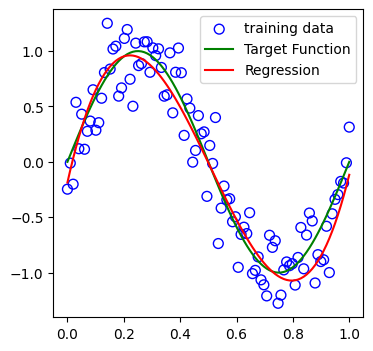

In [22]:
weights = gradient_descent(ssr_gradient, x_train, y_train, start=torch.rand(4), learn_rate=0.7, n_iter=50000, batch_size=10)

plt.figure(figsize=[4,4])
plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.plot(x_test, y_test, "-g", label="Target Function")

# plug in x,y vals into final hypothesis
y_new = [weights[0] + x*weights[1] + weights[2]*x**2 + weights[3]*x**3 for x in x_test]
plt.plot(x_test, y_new, '-r', label="Regression")
plt.legend()
plt.show()

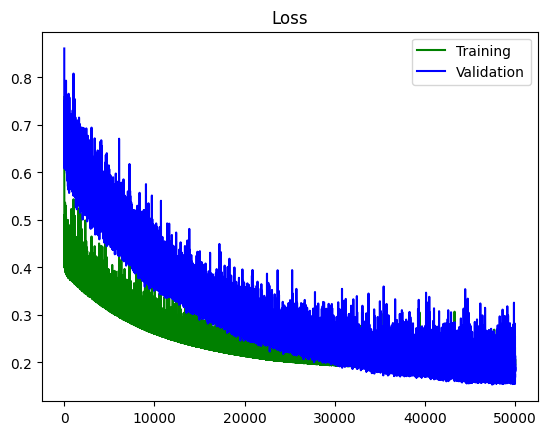

In [24]:
plt.plot(range(len(trainingSet)), trainingSet, "-g", label="Training")
plt.plot(range(len(validationSet)), validationSet, "-b", label="Validation")
plt.title("Loss")
plt.legend()
plt.show()